# Introduction

This notebook is dedicated to exploring and visualizing data features before applying deep learning for predicting credit approval. The objective is to understand the distribution and relationships of various features within the dataset, which will ultimately aid in the development and improvement of our predictive models.

Accurate prediction of credit approval is crucial for optimizing lending strategies, improving risk management, and enhancing financial decision-making processes. By analyzing historical credit data, we can identify patterns and trends that indicate the likelihood of a credit application being approved. The target column in this dataset is "Status," which represents the status of someone's credit. The values in this column are as follows:

- 0, C, X = Very Good (No Loan Problem)
- 1 = Good
- 2 - 3 = Not Bad
- 4 = Bad
- 5 = Very Bad

This knowledge enables financial institutions to make informed decisions, such as adjusting lending criteria or targeting specific customer segments to mitigate risk.


In [1]:
#!nvcc -V && which nvcc

In [2]:
#!python --version
#!nvidia-smi

In [3]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

# Importing Libraries

In [4]:
# importing libraries fundamentals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
%matplotlib inline

# Library for Null Values Imputing
import missingno as msno

# importing cudas

# Loading the Dataset

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [6]:
# load cudas extension

# %load_ext cudf.pandas

# import data from gdrive

df = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
df2 = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')

## Dataset Information

In [7]:
df.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
print(df.shape)
print(df2.shape)

(438557, 18)
(1048575, 3)


In [10]:
df.describe()
# description of dataset

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [11]:
df.describe(include='object').T

,count,unique,top,freq
CODE_GENDER,438557,2,F,294440
FLAG_OWN_CAR,438557,2,N,275459
FLAG_OWN_REALTY,438557,2,Y,304074
NAME_INCOME_TYPE,438557,5,Working,226104
NAME_EDUCATION_TYPE,438557,5,Secondary / secondary special,301821
NAME_FAMILY_STATUS,438557,5,Married,299828
NAME_HOUSING_TYPE,438557,6,House / apartment,393831
OCCUPATION_TYPE,304354,18,Laborers,78240


In [12]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
df.shape
# Dataset has 119390 rows and 32 columns

(438557, 18)

In [14]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

## Find the Categorical and Numerical dtype

In [15]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')


In [16]:
for col in object_columns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for CODE_GENDER:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
Counts for FLAG_OWN_CAR:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
Counts for FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
Counts for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64
Counts for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
Counts for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: in

In [17]:
num_columns = df.select_dtypes(include=['float', 'int64']).columns
print(num_columns)

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')


## Dealt with Null Values



In [18]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [19]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   OCCUPATION_TYPE  304354 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


In [20]:
def fill_categorical(df):
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

df = fill_categorical(df)

/tmp/ipykernel_34/635066549.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [21]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Empty DataFrame


theres no null value again :)

## Dealt with Duplicated Value

In [22]:
df['ID'].duplicated().sum()

47

In [23]:
df = df.drop_duplicates(subset='ID',keep='first')

In [24]:
df['ID'].duplicated().sum()

0

# Feature Engineering 

## Classifying Status for Good Interpretation

from original dataset, the int in "STATUS", stands for:
- 0: 1-29 days past due 
- 1: 30-59 days past due 
- 2: 60-89 days overdue 
- 3: 90-119 days overdue 
- 4: 120-149 days overdue 
- 5: Overdue or bad debts, write-offs for more than 150 days 
- C: paid off that month 
- X: No loan for the month

Then i classification again dataset for good interpretation. Credit Classes that i classified:

- 0, C and X = Very Good (No Loan Problem)
- 1 = Good
- 2 - 3 = Not Bad
- 4 = Bad
- 5 = Very Bad

In [25]:
df2['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [26]:
def classify_client(status):
    if status in ['C', 'X', '0']:
        return 'Very Good'
    
    elif status in ['1']:
        return 'Good'
    
    elif status in ['2', '3']: 
        return 'Not Bad'
    
    elif status in ['4']:
        return 'Bad'
    
    elif status in ['5']:
        return 'Very Bad'
    
    else:
        return 'Unknown'

    
df2['STATUS'] = df2['STATUS'].apply(classify_client)
print(df2['STATUS'].value_counts())

STATUS
Very Good    1034381
Good           11090
Very Bad        1693
Not Bad         1188
Bad              223
Name: count, dtype: int64


In [27]:
# Retrieve Data to 'int' again and Rank the Classes into'int'

def retrieve_data(status):
    if status in ['Very Good']:
        return 1
    
    elif status in ['Good']:
        return 2
    
    elif status in ['Not Bad']:  # corrected this line
        return 3
    
    elif status in ['Bad']:
        return 4
    
    elif status in ['Very Bad']: 
        return 5
    
    else:
        return 0

df2['STATUS'] = df2['STATUS'].apply(retrieve_data)
print(df2['STATUS'].value_counts())

STATUS
1    1034381
2      11090
5       1693
3       1188
4        223
Name: count, dtype: int64


In [28]:
# Group by ID and create separate DataFrames for STATUS and MONTHS_BALANCE

credit_status = df2.groupby('ID')['STATUS'].agg("max").reset_index()
months_balance = df2.groupby('ID')['MONTHS_BALANCE'].agg("max").reset_index()

# Merging the dataframes

df = pd.merge(df, credit_status, how='inner', on='ID')
df = pd.merge(df, months_balance, how='inner', on='ID')

In [29]:
df = df.sort_values('AMT_INCOME_TOTAL')
df = df.reset_index(drop=True)
df.ID=df.index
df.columns = ('User_id',
              'Gender',
              'Car',
              'Realty',
              'children_count',
              'income_amount',
              'income_type',
              'education_type',
              'Family_status',
              'Housing_type',
              'Days_birth',
              'Days_employed',
              'Mobile',
              'Work_phone',
              'Phone',
              'Email',
              'Occupation_type',
              'Count_family_members',
              'Status',
              'Month_Balance'
              )

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_id               36457 non-null  int64  
 1   Gender                36457 non-null  object 
 2   Car                   36457 non-null  object 
 3   Realty                36457 non-null  object 
 4   children_count        36457 non-null  int64  
 5   income_amount         36457 non-null  float64
 6   income_type           36457 non-null  object 
 7   education_type        36457 non-null  object 
 8   Family_status         36457 non-null  object 
 9   Housing_type          36457 non-null  object 
 10  Days_birth            36457 non-null  int64  
 11  Days_employed         36457 non-null  int64  
 12  Mobile                36457 non-null  int64  
 13  Work_phone            36457 non-null  int64  
 14  Phone                 36457 non-null  int64  
 15  Email              

# Exploratory Data Analysis


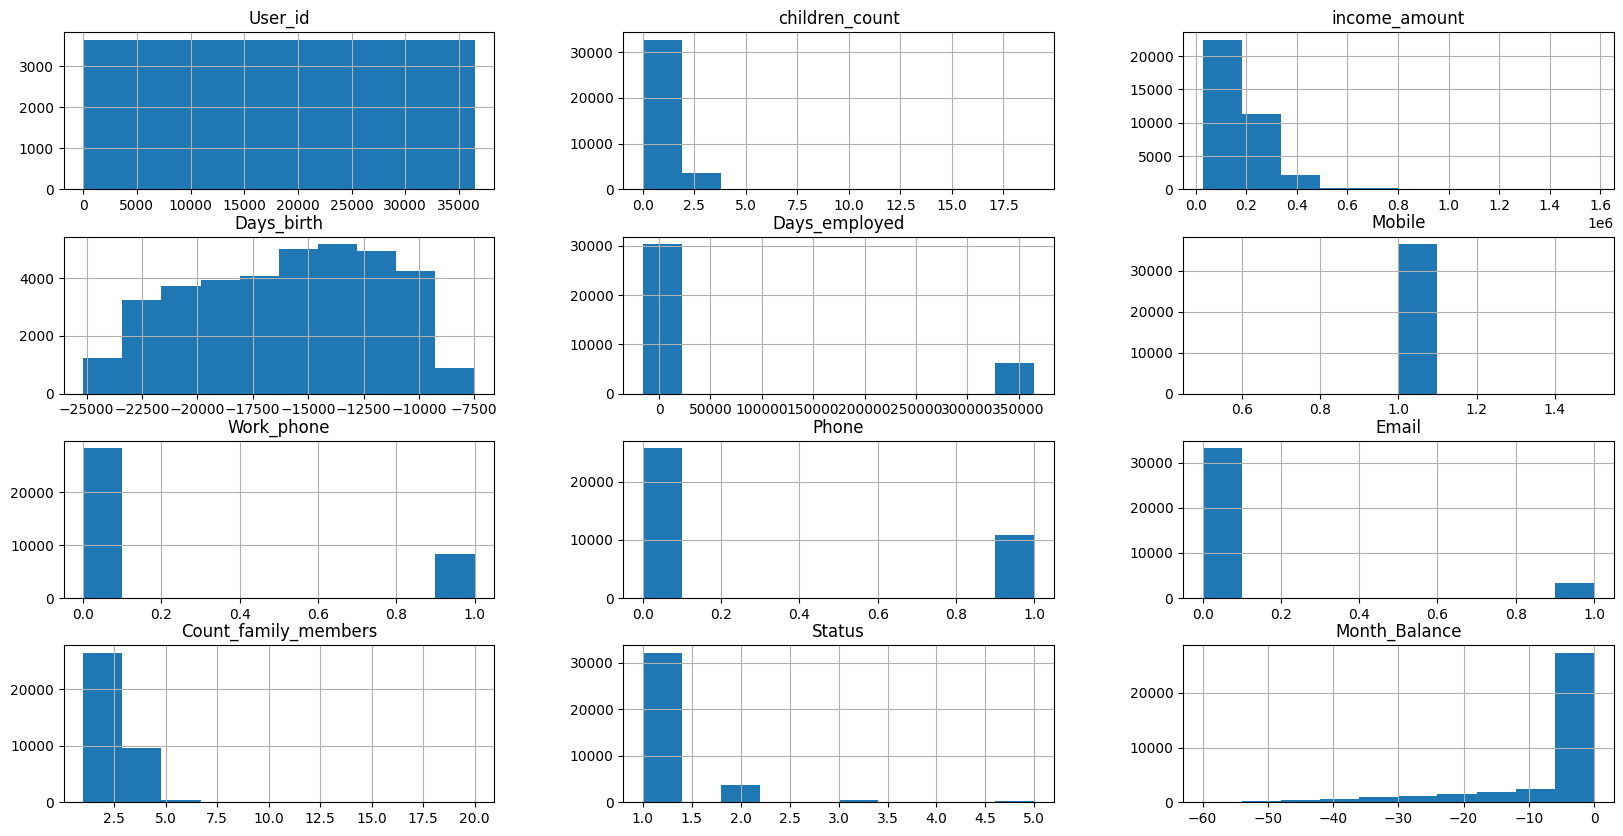

In [31]:
df.hist(figsize=(20, 10))
plt.show()

In [32]:
# Plotting Value Counts of 1 column with Pie Plot

def plot_pie_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    fig1, ax1 = plt.subplots()
    ax1.pie(target_column, labels=target_column.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.show()

In [33]:
# Plotting Value Counts of 1 column with Bar Plot

def plot_bar_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    target_column.plot(kind='bar', color=plt.cm.tab20(range(len(target_column))))
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Plotting Target Column (Status)

In [34]:
df['Status'].unique()

array([1, 2, 3, 5, 4])

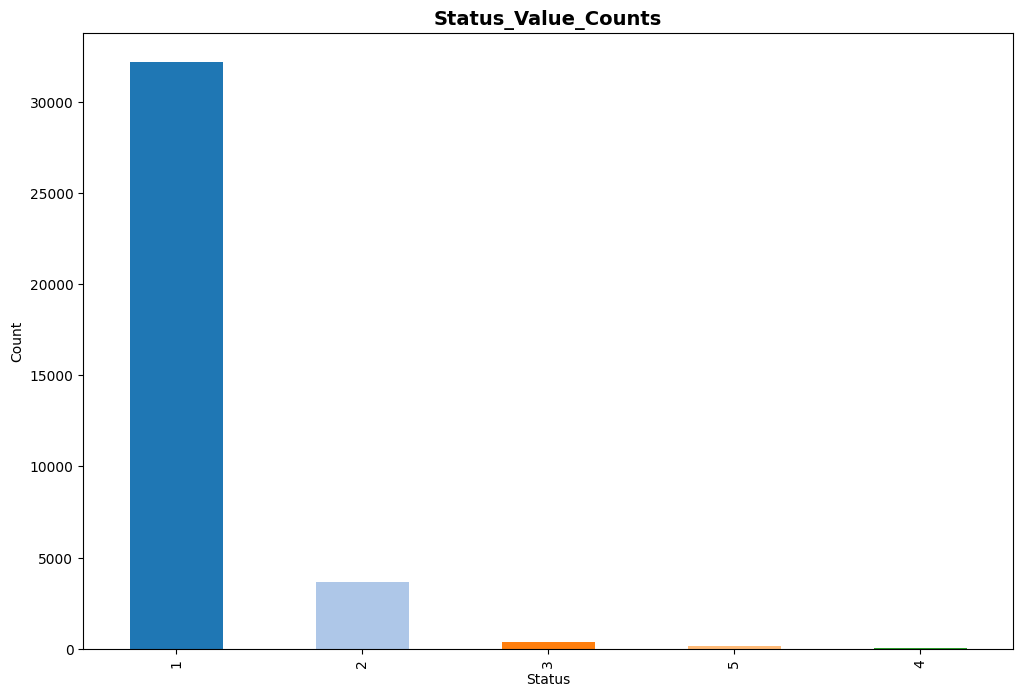

In [35]:
plot_bar_single("Status")

## Plotting Num Cols and Cat Cols

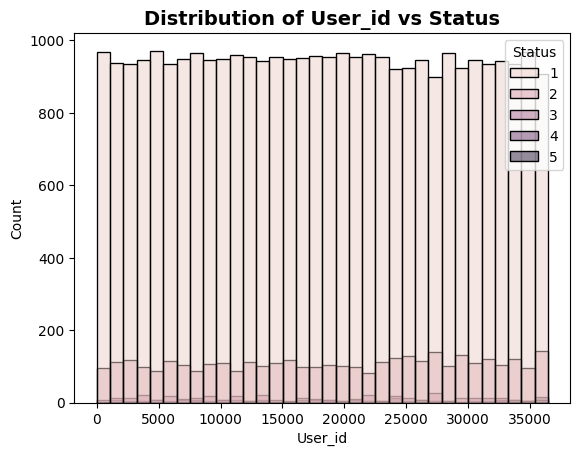

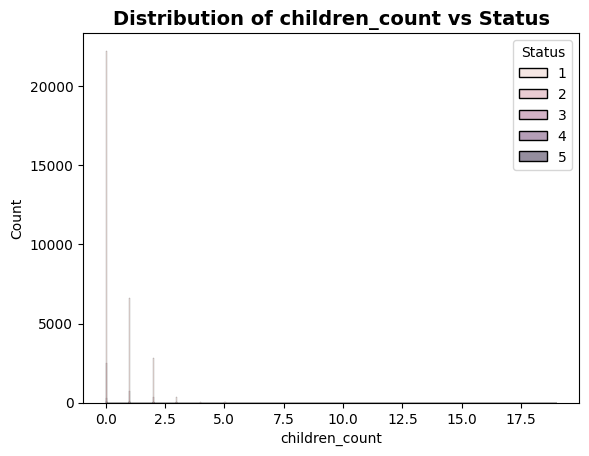

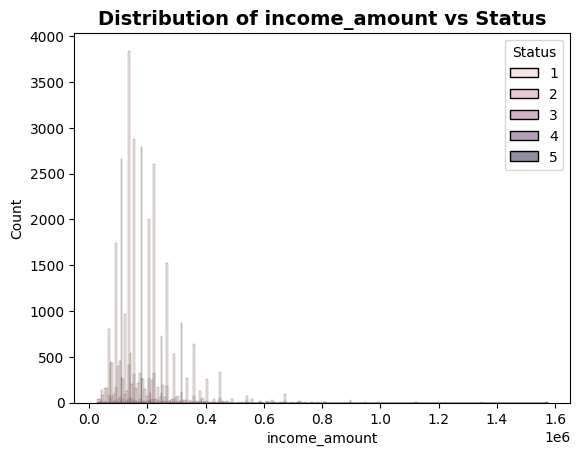

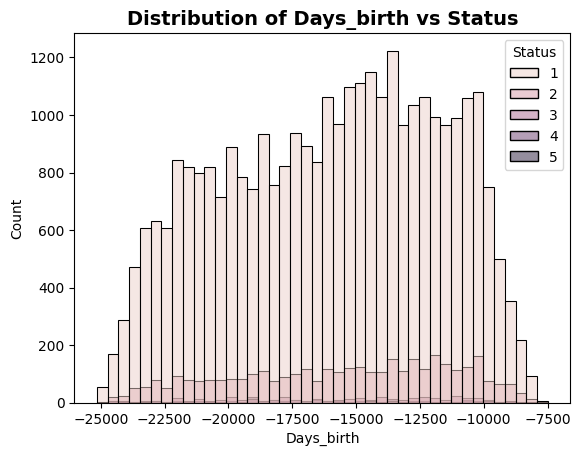

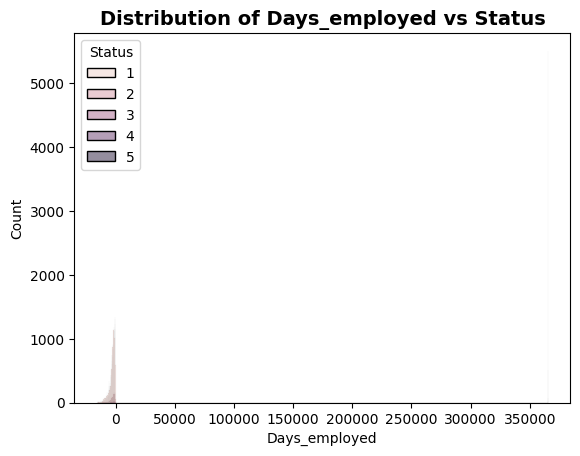

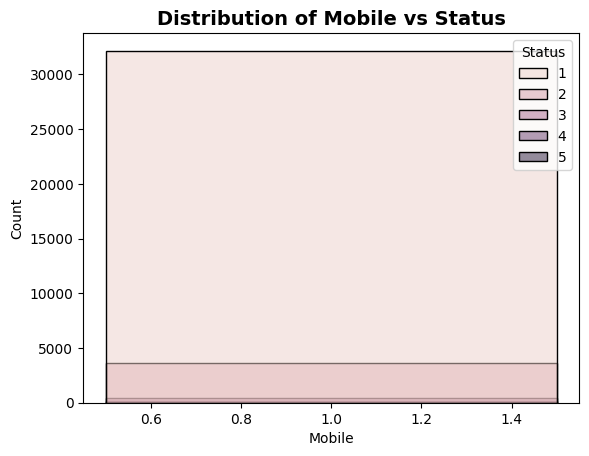

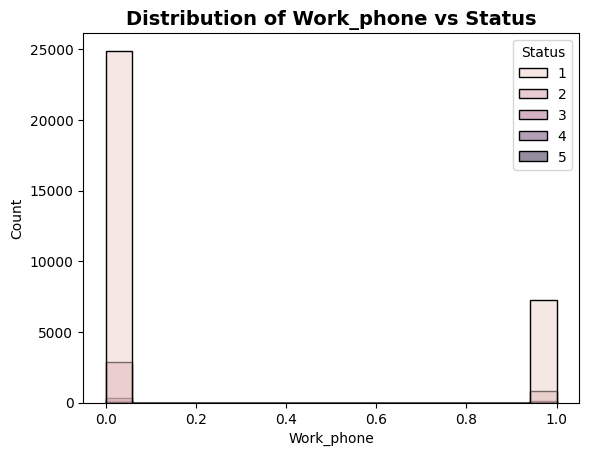

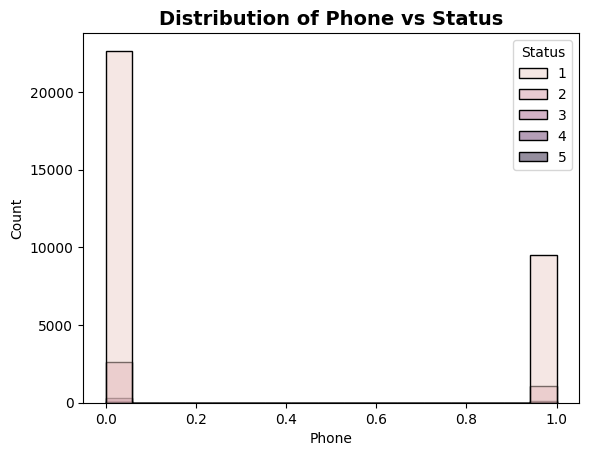

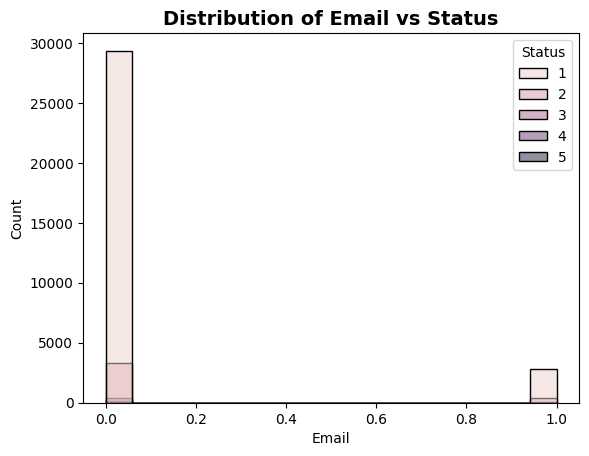

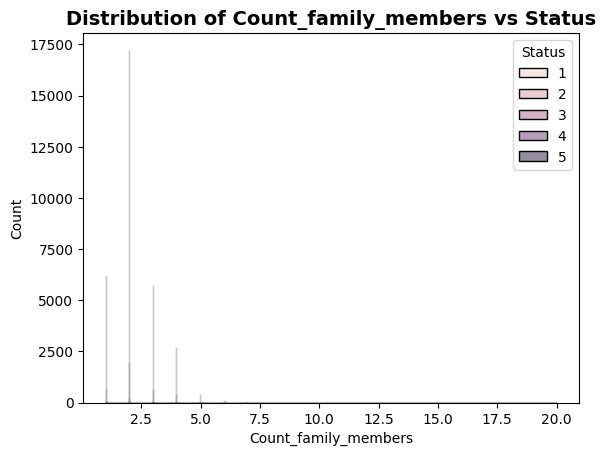

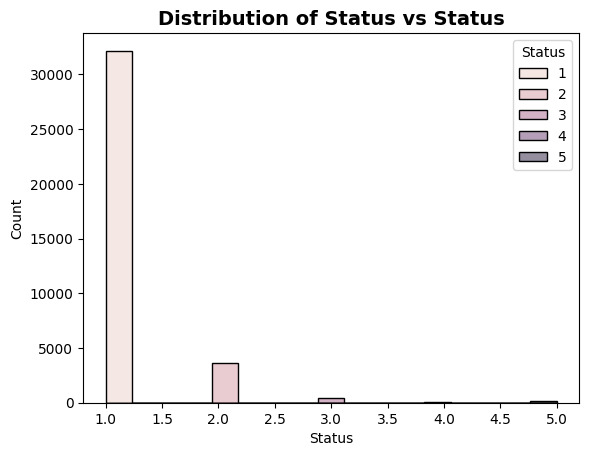

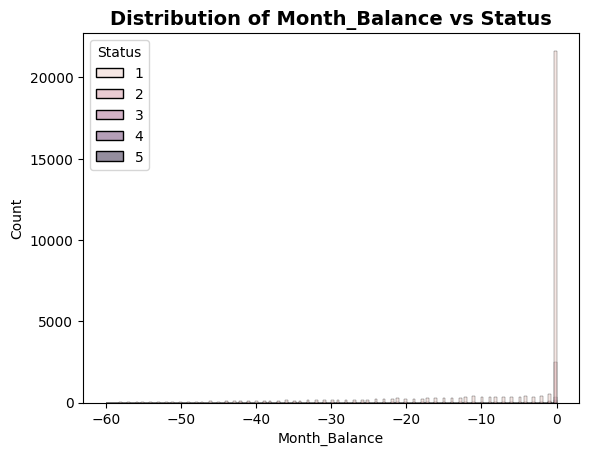

In [36]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Plot histograms
for col in num_col:
    sns.histplot(data=df, x=col, hue='Status', kde=False) # KDE falase if data was in lower dimensions
    plt.title(f'Distribution of {col} vs Status', fontweight="bold", size=14)
    plt.show()
    print("\n")

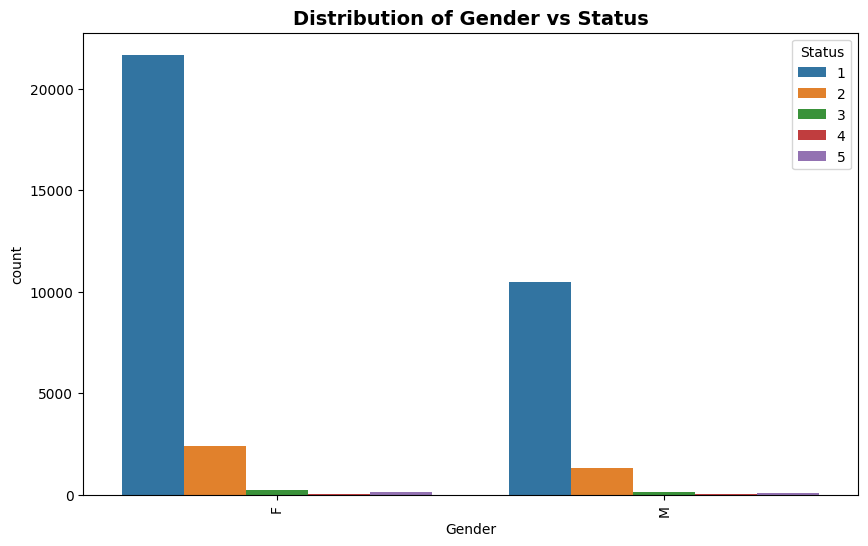

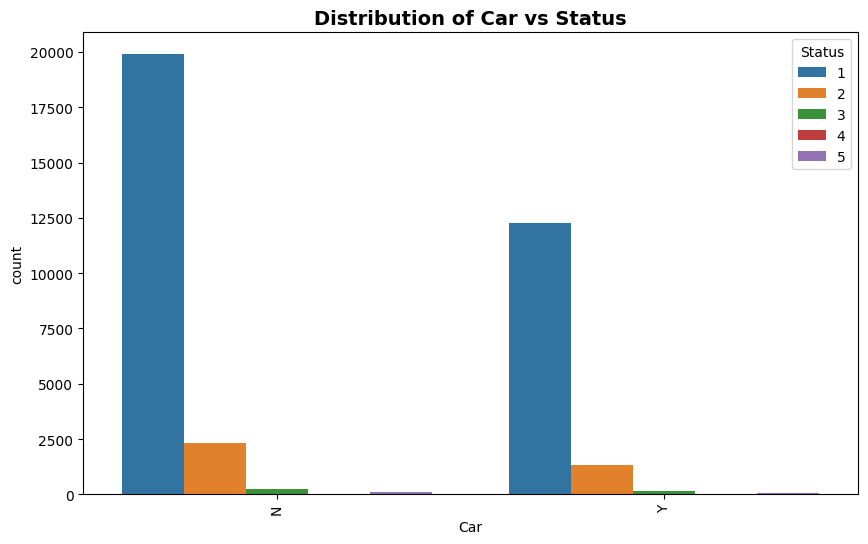

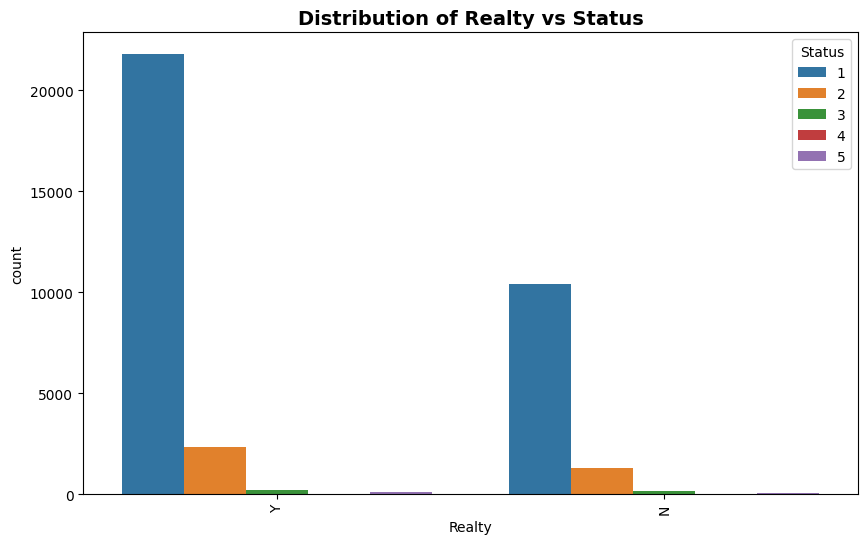

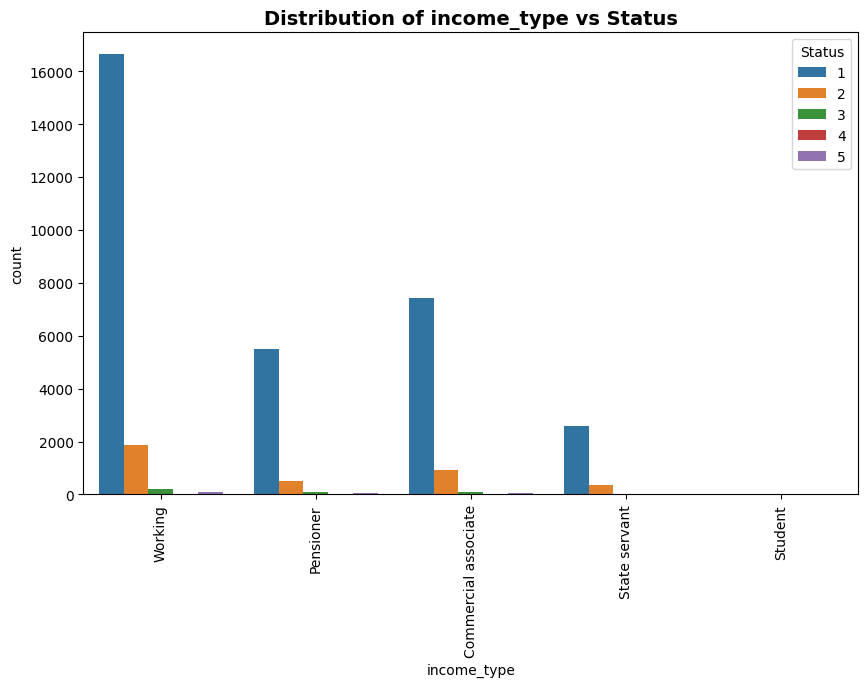

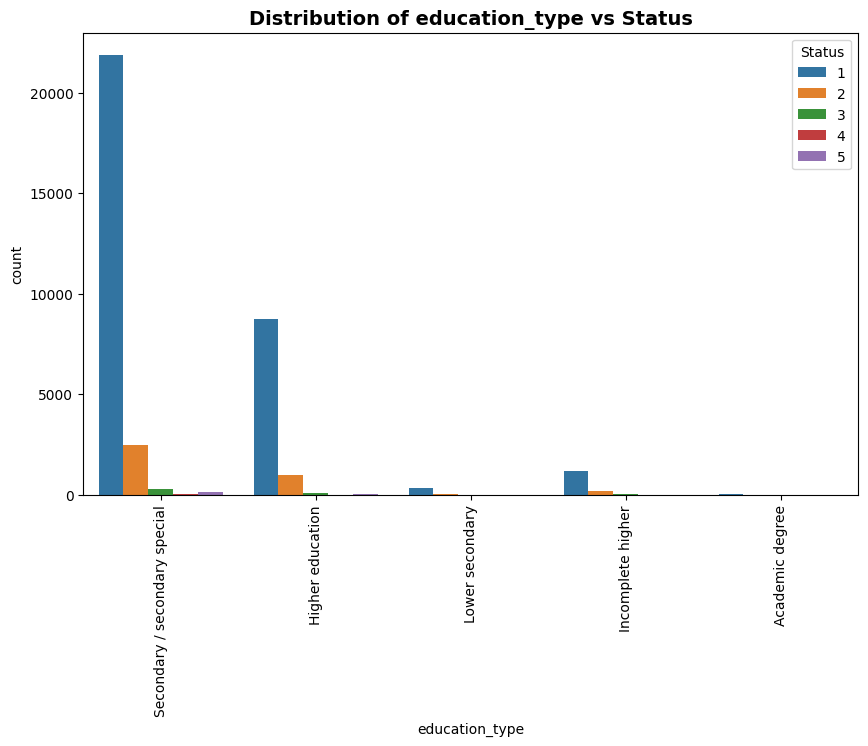

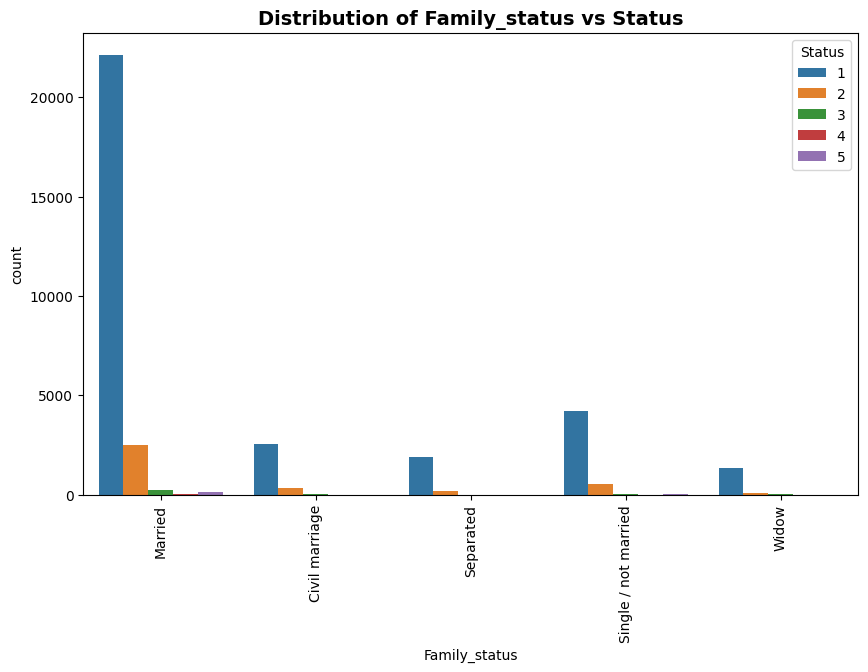

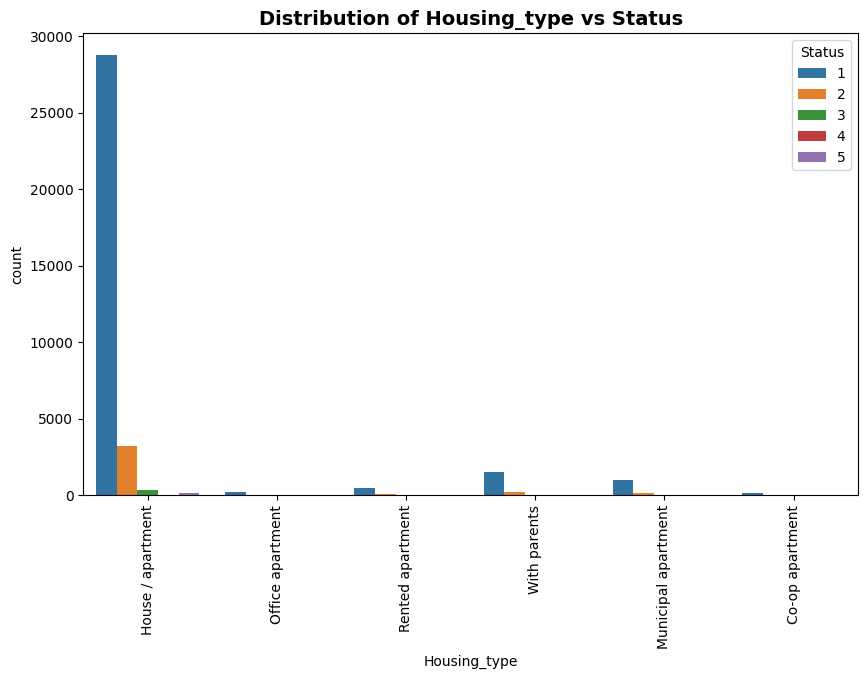

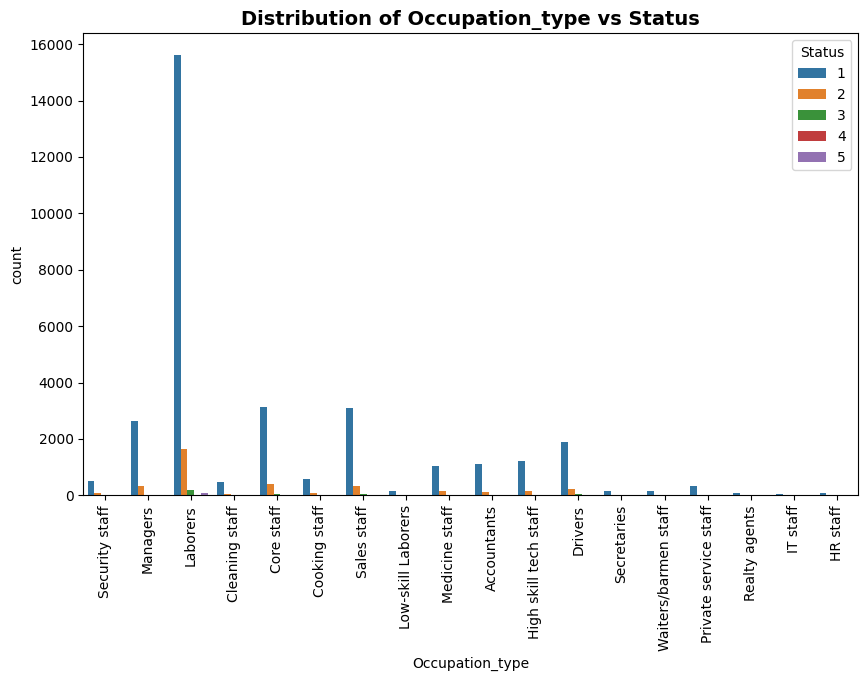

In [37]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue= 'Status' )
  plt.title(f'Distribution of {col} vs Status', fontweight="bold", size=14)
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

# Plotting All Data Features

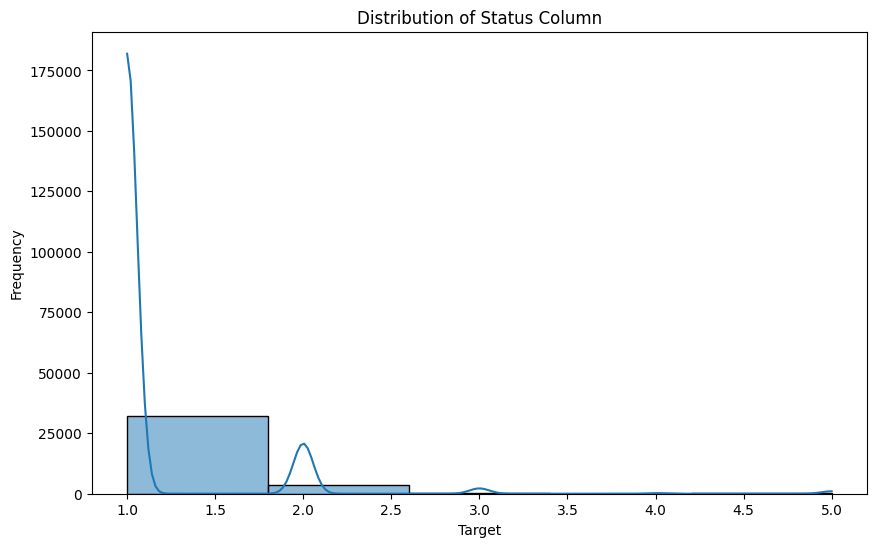

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Status'], bins=5, kde=True)
plt.title('Distribution of Status Column')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

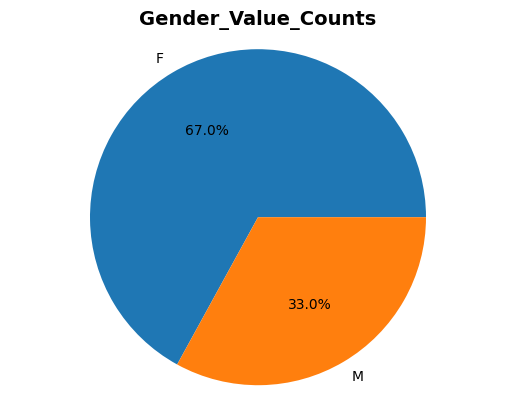

In [39]:
plot_pie_single("Gender")

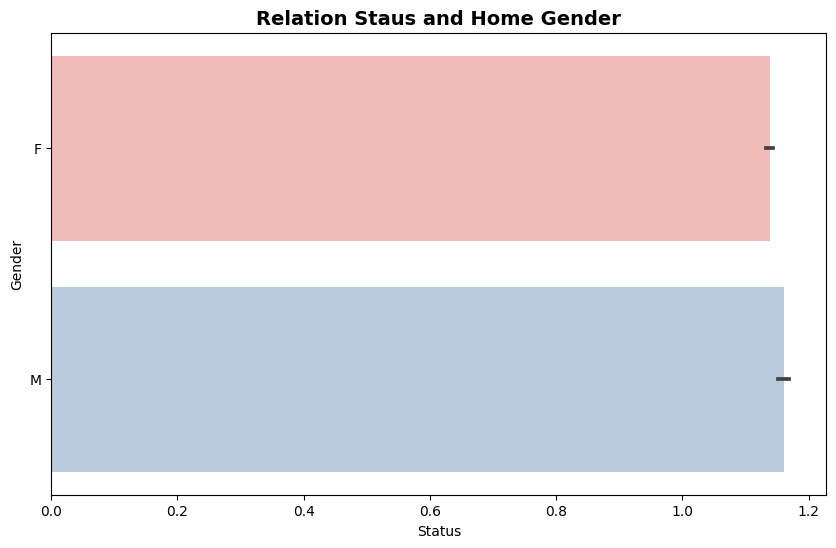

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Status"], y=df["Gender"], palette='Pastel1')
plt.title("Relation Staus and Home Gender", fontweight="bold", size=14)
plt.show()

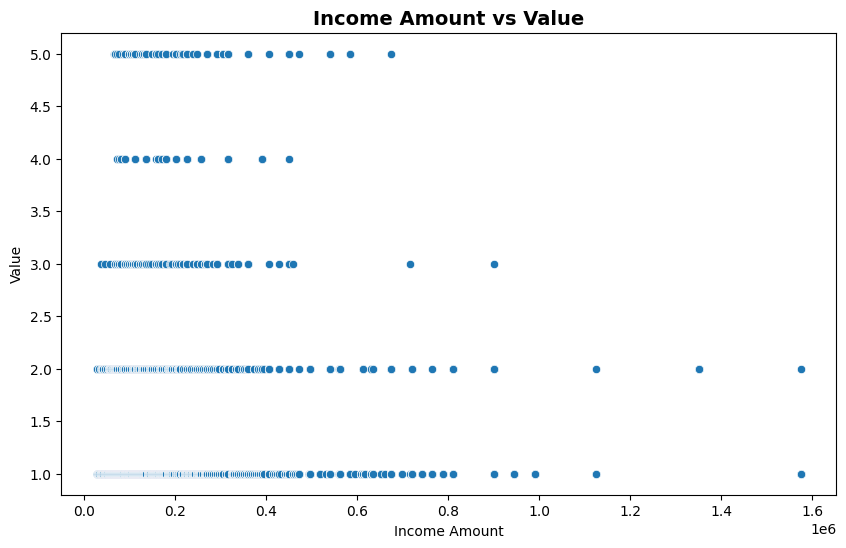

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_amount', y='Status', data=df, marker='o')
plt.title('Income Amount vs Value', fontweight="bold", size=14)
plt.xlabel('Income Amount')
plt.ylabel('Value')
plt.show()

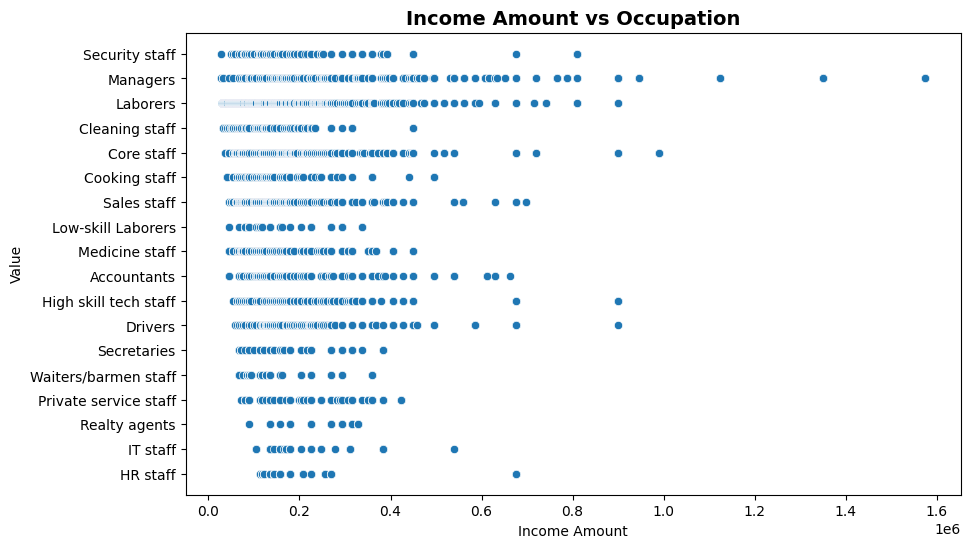

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_amount', y='Occupation_type', data=df, marker='o')
plt.title('Income Amount vs Occupation', fontweight="bold", size=14)
plt.xlabel('Income Amount')
plt.ylabel('Value')
plt.show()

In [44]:
mean_income_of_occupation_type = df.groupby(["Occupation_type"])["income_amount"].mean()
mean_income_of_occupation_type 

Occupation_type
Accountants              202463.865834
Cleaning staff           149141.107078
Cooking staff            146517.251908
Core staff               190172.786967
Drivers                  209797.240412
HR staff                 193764.705882
High skill tech staff    196053.579176
IT staff                 199860.000000
Laborers                 172564.740903
Low-skill Laborers       133920.000000
Managers                 279117.292829
Medicine staff           166114.618061
Private service staff    198863.372093
Realty agents            247500.000000
Sales staff              174984.897848
Secretaries              168079.470199
Security staff           177037.753378
Waiters/barmen staff     156206.896552
Name: income_amount, dtype: float64

Text(0.5, 1.0, 'Arriving year, Lead time and Cancelations')

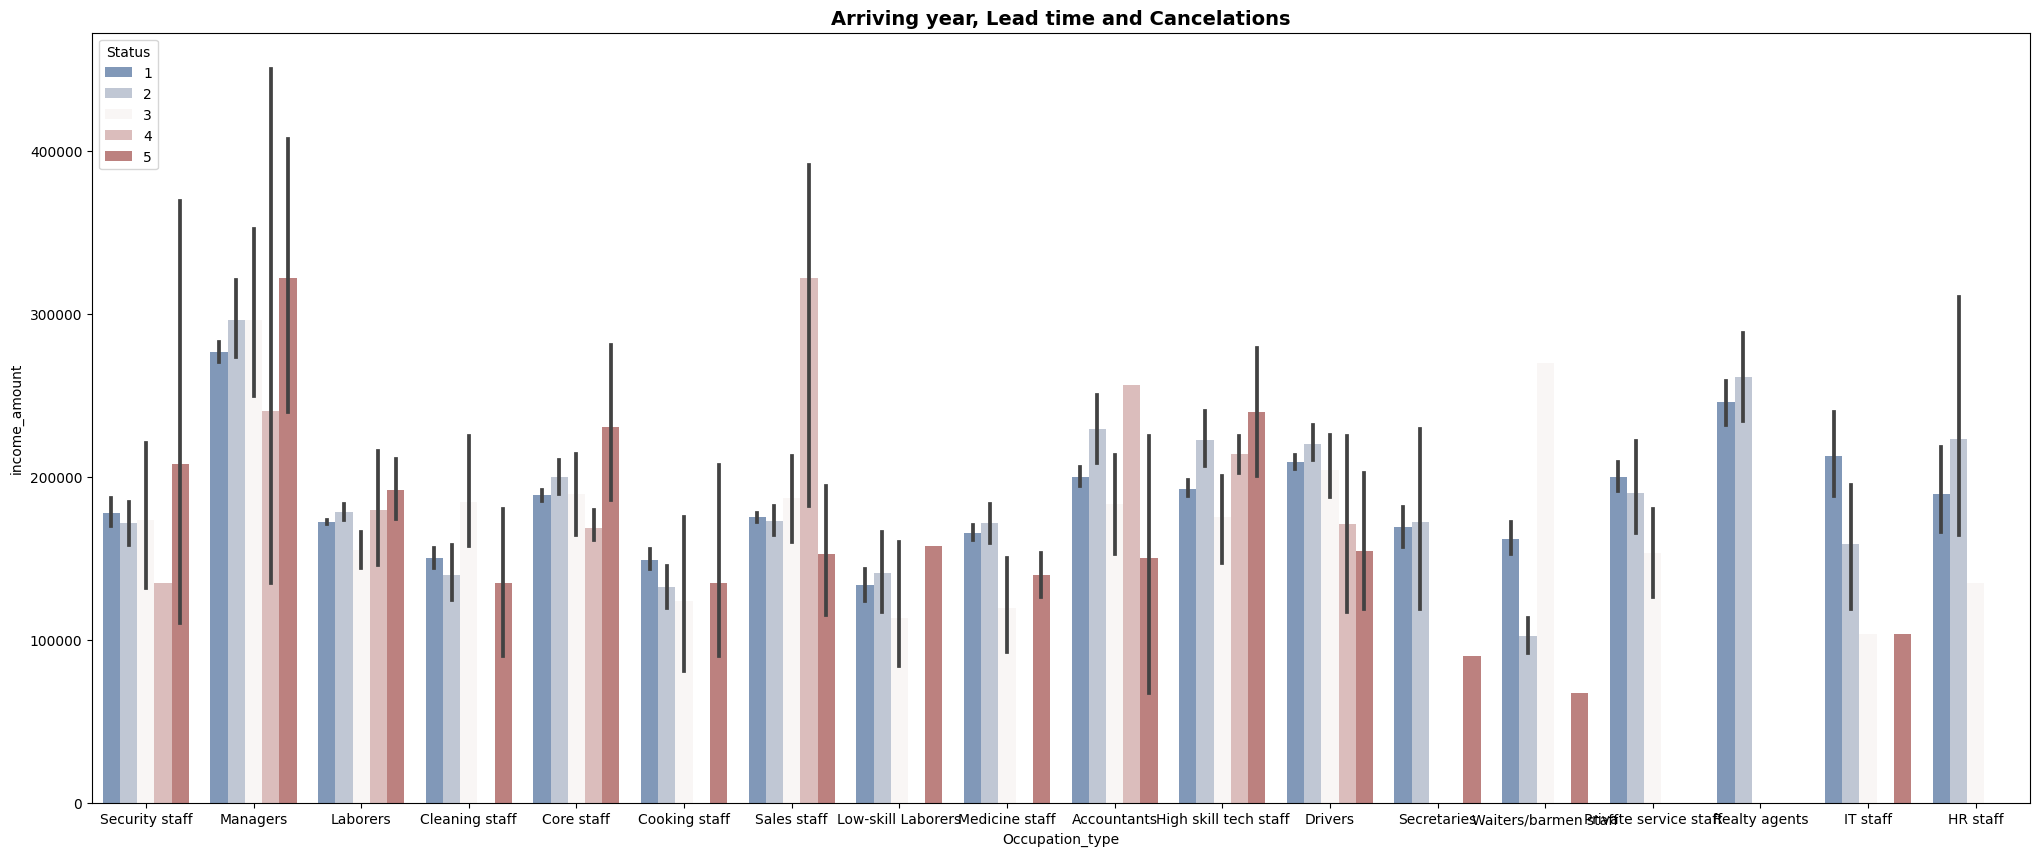

In [45]:
plt.figure(figsize=(25,10))
sns.barplot(x='Occupation_type', y='income_amount',hue='Status', data= df, palette='vlag')
plt.title('Arriving year, Lead time and Cancelations', fontweight="bold", size=14)

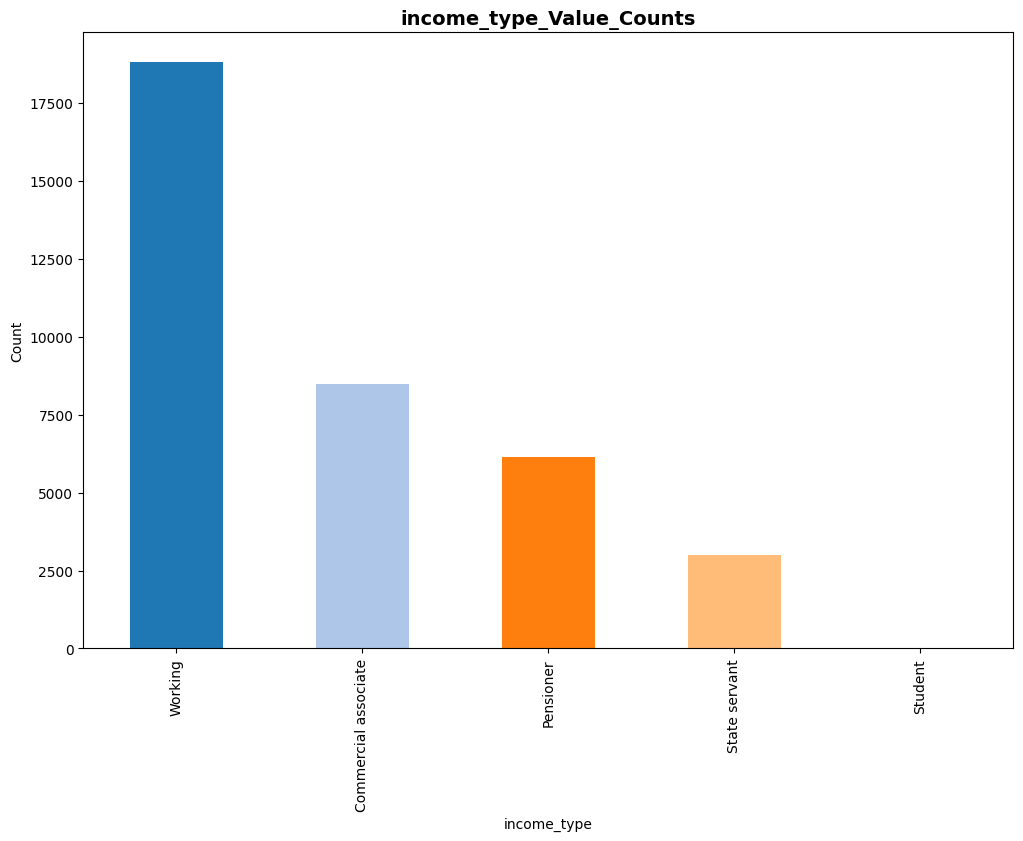

In [46]:
plot_bar_single('income_type')

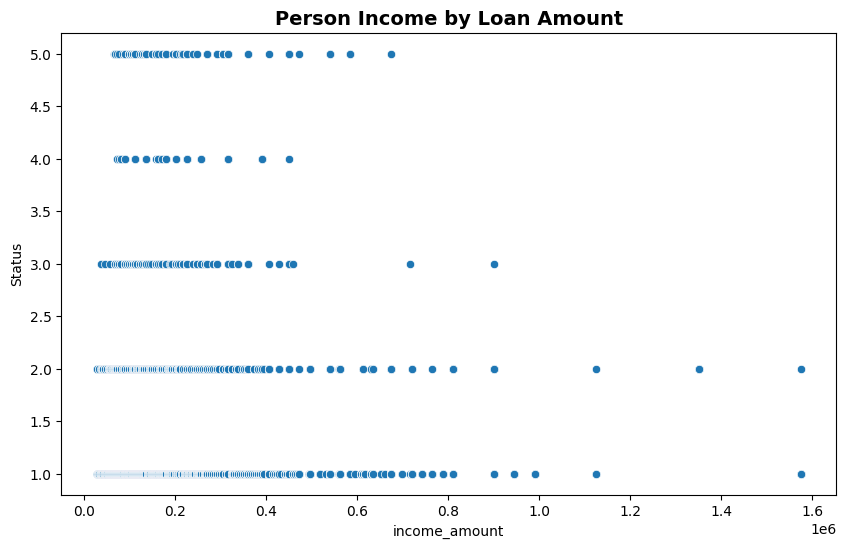

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="income_amount", y="Status", data=df)
plt.title("Person Income by Loan Amount", fontweight="bold", size=14)
plt.show()

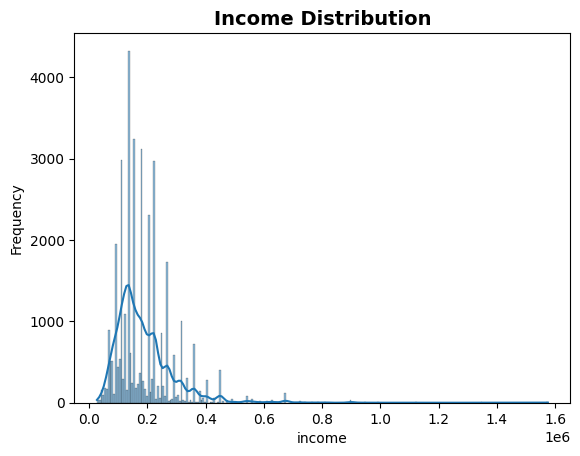

In [48]:
income_plot = pd.Series(df.income_amount, name="income")
plt.ylabel('Frequency')
sns.histplot(income_plot, kde=True)  
plt.title('Income Distribution', fontweight="bold", size=14)
plt.show()

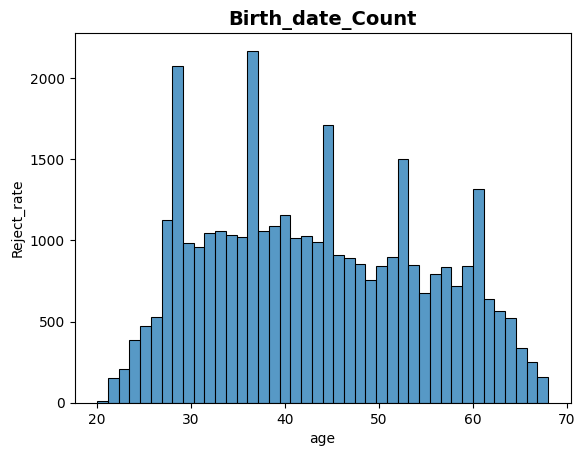

In [49]:
age_series = df.Days_birth.apply(lambda x: int(-x / 365.25))
plt.ylabel('Reject_rate')
age_plot = pd.Series(age_series, name="age")
plt.title('Birth_date_Count', fontweight="bold", size=14)
sns.histplot(age_plot)
plt.show()

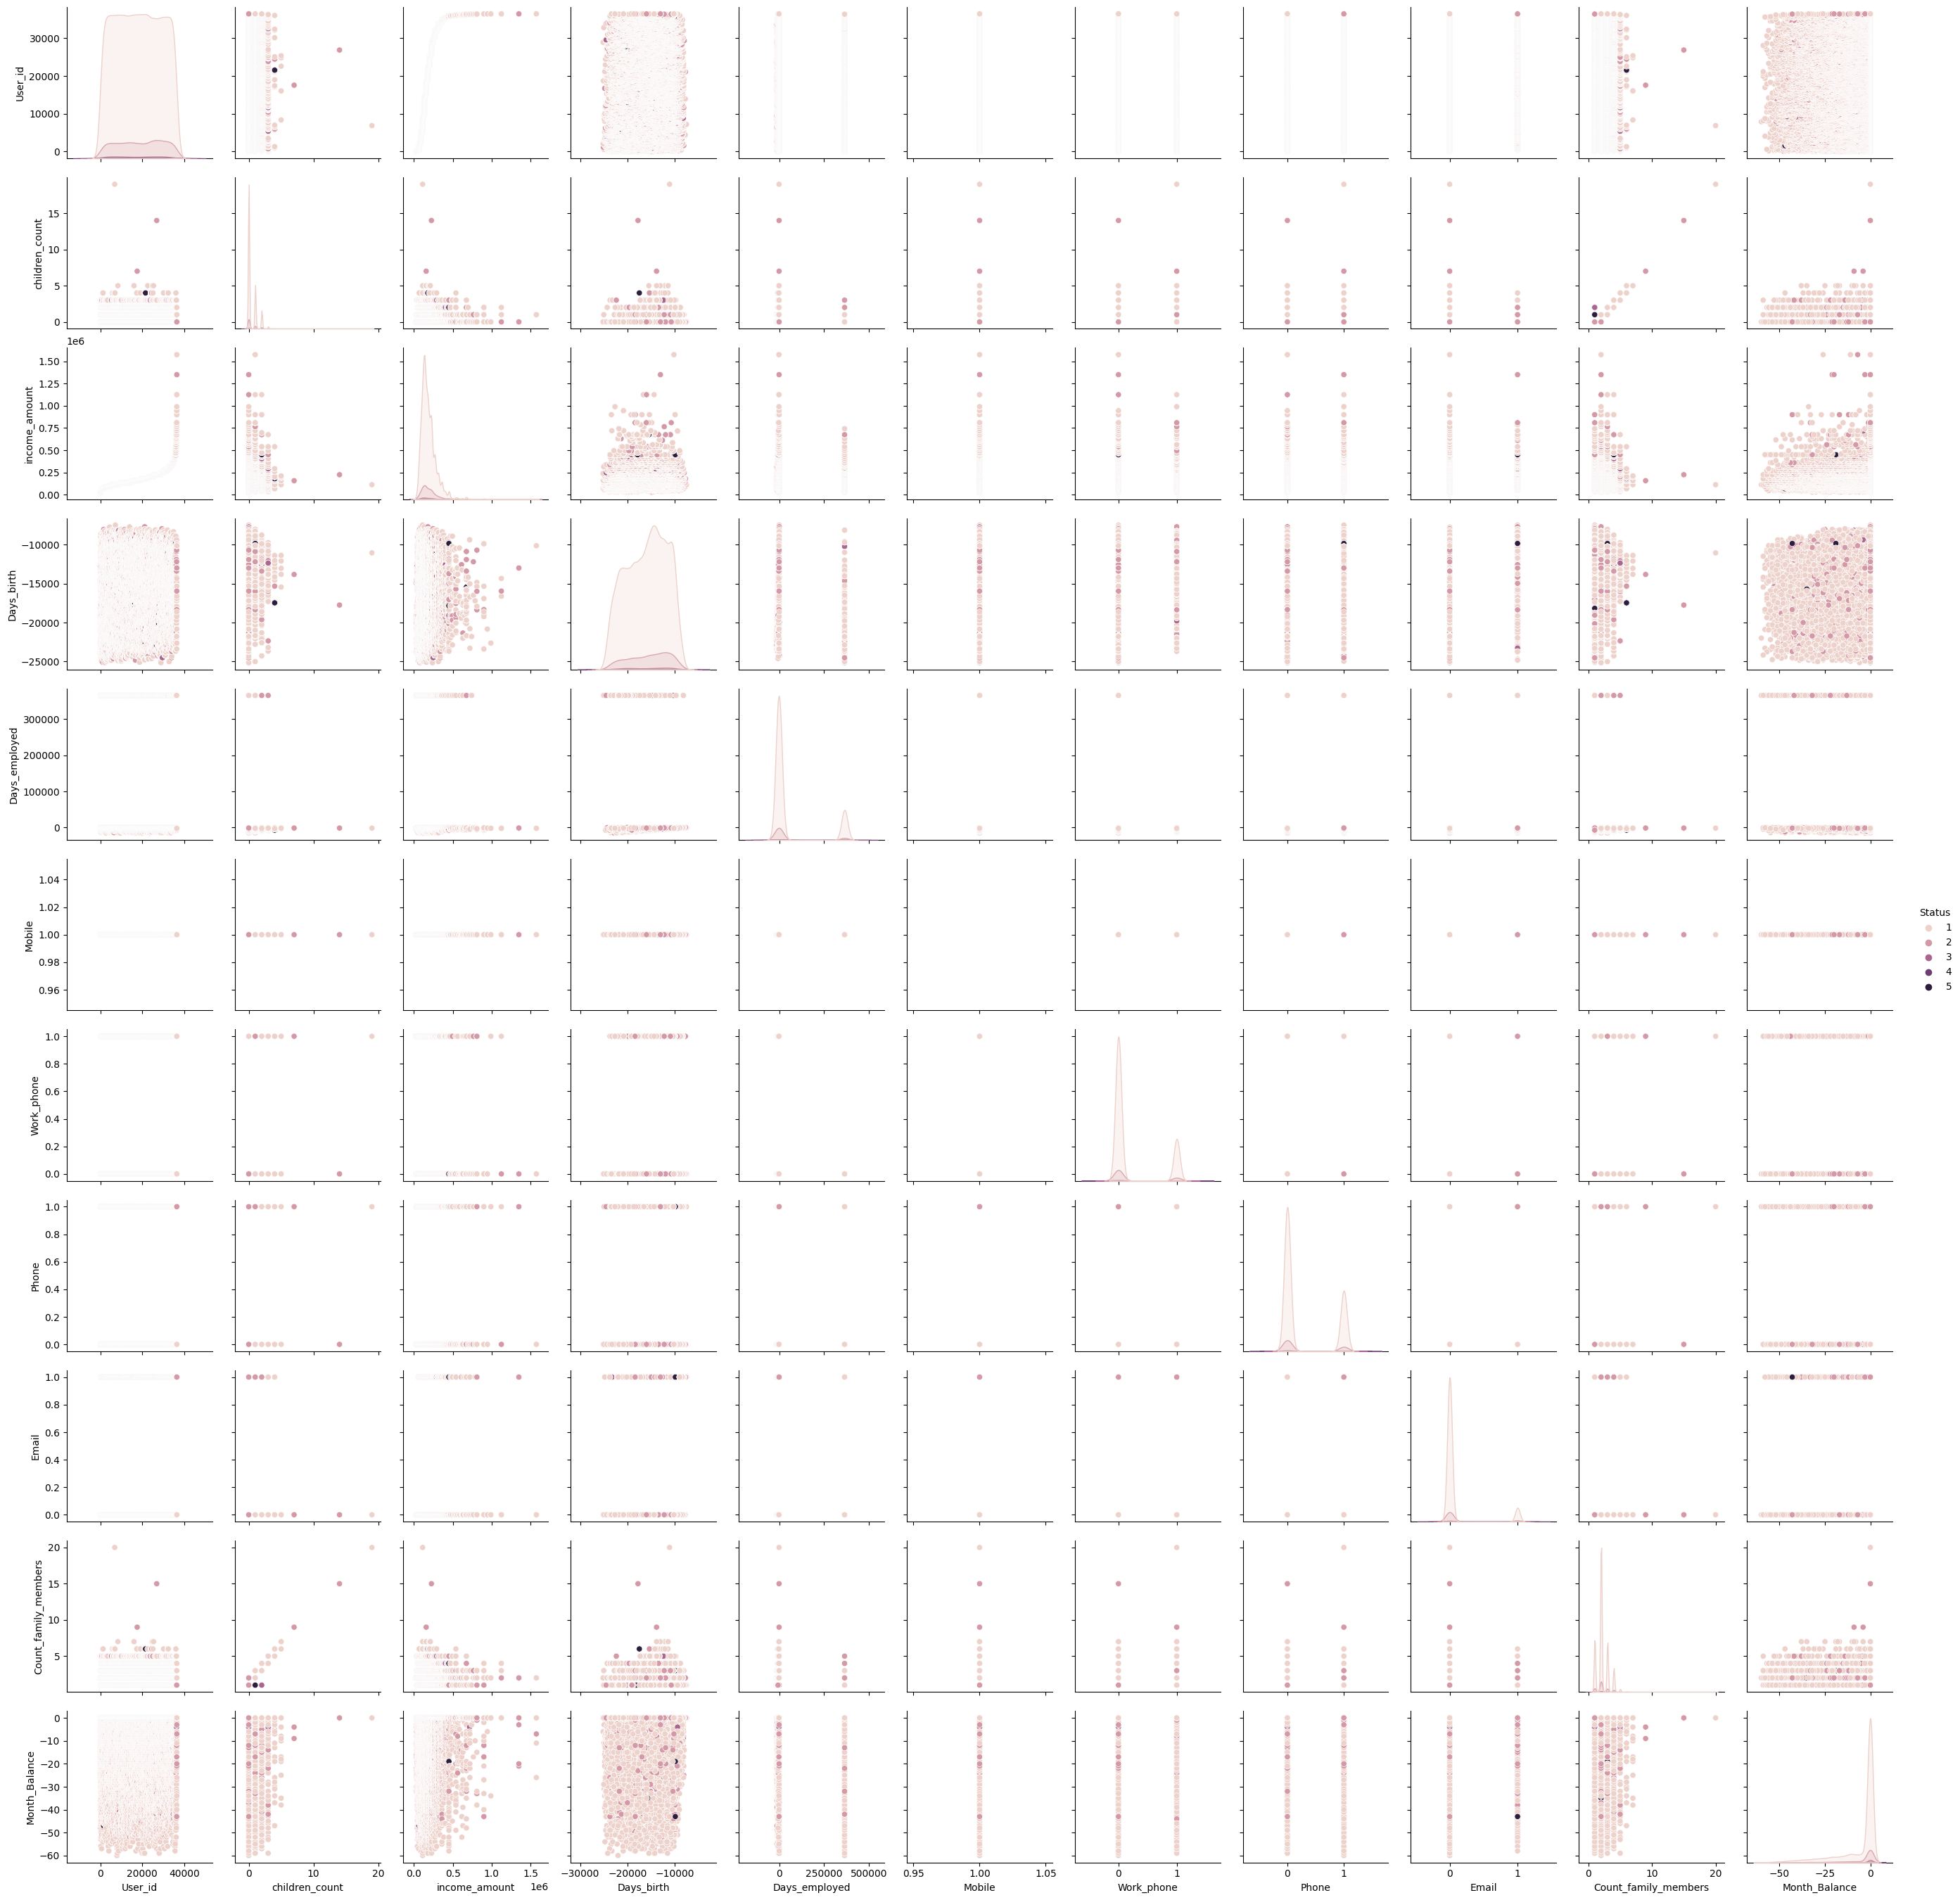

In [52]:
sns.pairplot(df,hue="Status")